<h2>Results</h2>

All the Y values range between -1 and 1. Despite being within this range, the maximum Y value and some other features are not consistent. Therefore, the results are obtained both with normalized Y values and without normalizing them for comparison.


<table>
<tr>
  <th colspan="2"> </th>
  <th>Average_mse</th>
  <th>Average_time</th>
</tr>
<tr >
  <td rowspan="2"> standard</td>
  <td> y normalized </td>
  <td> 2.2E-02 </td>
  <td> 203 </td>
</tr>
<tr>
  <td> - </td>
  <td> 1.7E-02 </td>
  <td> 202 </td>
</tr>
<tr>


</tr>
<tr>
  <td rowspan="2">minmax</td>
  <td>y normalized </td>
  <td>1.7E-04 </td>
  <td> 246 </td>
</tr>
<tr>
  <td> - </td>
  <td>1.2E-04</td>
  <td> 238 </td>
</tr>
</table>

In both normalization methods, the model performs better on the dataset where Y is not normalized.An MinMax have smaller mse.


To choose the optimal configuration, we utilize data from k-fold cross-validation across four metrics: 'average_mse', 'std_mse', 'average_r2', and 'average_time'. Configurations with the best performance in terms of these metrics are selected.

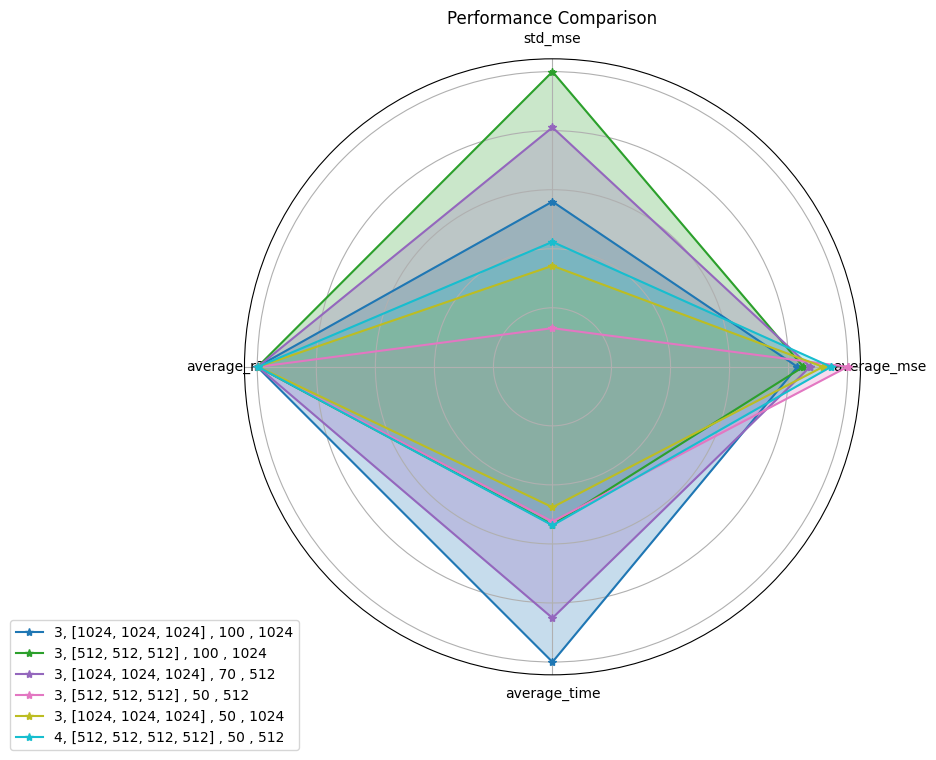

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('kf_results.csv')
top_mse_configs = df.nsmallest(3, 'average_mse')
top_std_mse_configs = df.nsmallest(3, 'std_mse')
top_r2_configs = df.nlargest(3, 'average_r2')

selected_configs = pd.concat([top_mse_configs, top_std_mse_configs, top_r2_configs])
selected_configs = selected_configs.drop_duplicates()

metrics_columns = ['average_mse', 'std_mse', 'average_r2', 'average_time']
selected_data = selected_configs[metrics_columns]
max_values = selected_data.max()
normalized_data = selected_data / max_values
labels = metrics_columns
num_metrics = len(labels)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

label_positions = [0 ,90 , 180 , 270]   # 0 ,  120 , 240
cmap = plt.get_cmap('tab10', len(normalized_data))

for i in range(len(normalized_data)):
    color = cmap(i) 
    label_value = f'{selected_configs.iloc[i, 1]}, {selected_configs.iloc[i, 2]} , {selected_configs.iloc[i, 7]} , {selected_configs.iloc[i, 8]}'

    ax.plot(angles, normalized_data.iloc[i].tolist() + [normalized_data.iloc[i].iloc[0]], label=label_value, color=color, marker='*', linestyle='-')
    ax.fill(angles, normalized_data.iloc[i].tolist() + [normalized_data.iloc[i].iloc[0]], alpha=0.25, color=color)

ax.set_yticklabels([])
ax.set_thetagrids(label_positions, labels)  

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Performance Comparison')
plt.show()

As shown in the plot, the selected configurations exhibit good R^2 values, indicating strong predictive performance. While there are slight differences in the standard deviation of mean squared errors across folds and training times, the model with three hidden layers (1024 neurons each), 50 epochs, and a batch size of 1024 emerges as an efficient and accurate choice. This configuration balances high predictive accuracy (high R^2) with reasonable computational requirements (moderate training times and error deviations). And the model with three hidden layers (1024 neurons each), 100 epochs, and a batch size of 1024 can be the most accurate but a little time consuming.

For first configuration , [1024 , 1024 , 1024] the train and validation loss will be:
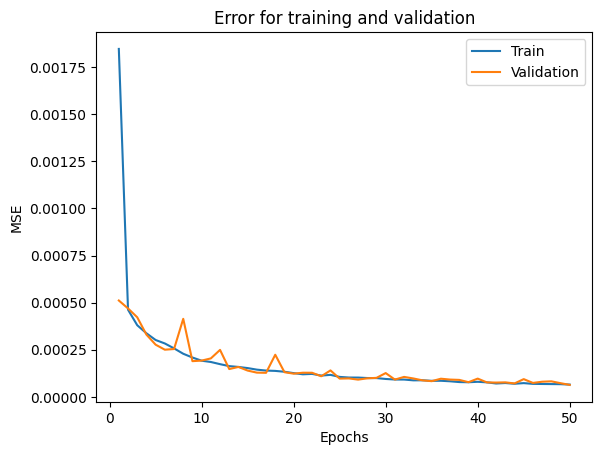

The model accurately predicts the aerodynamic coefficients, namely the drag coefficient (Cd) and lift coefficient (Cl). The predicted Cd and Cl values from the model are plotted against the corresponding training data obtained using XFOIL.

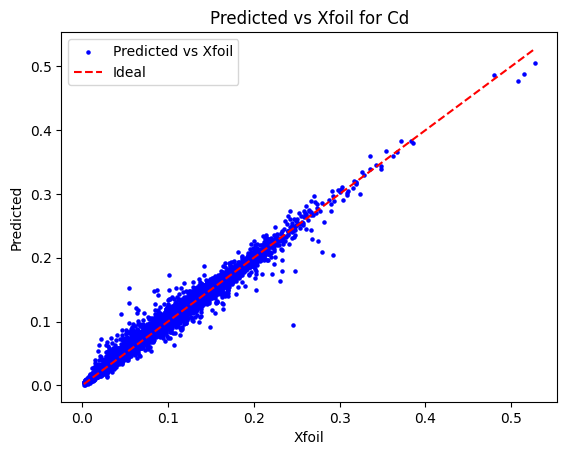
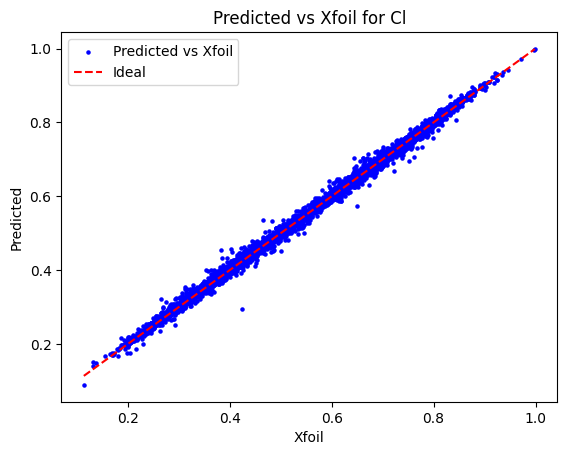


and with 100 epochs will be:

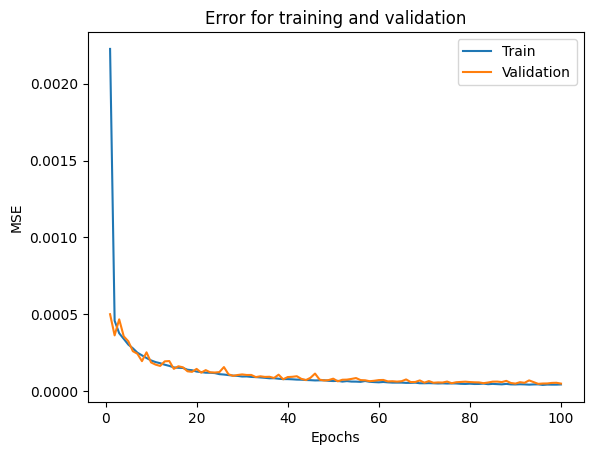

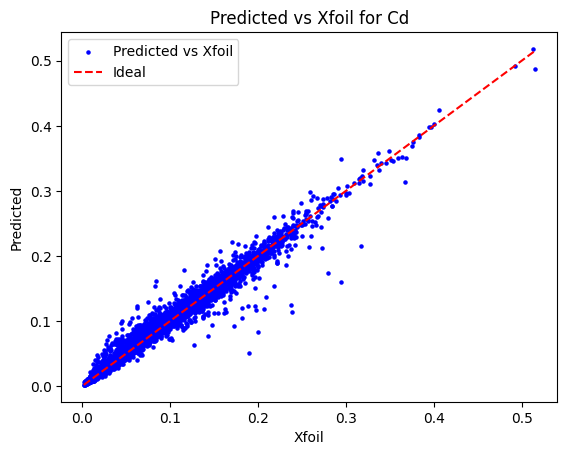
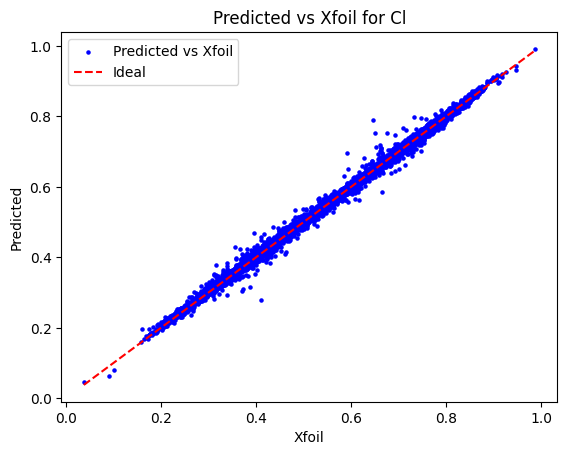

## Hyperparameter
While increasing the number of hidden layers initially reduces the mean squared error (MSE), the improvement becomes marginal after three layers. However, adding more layers leads to an increase in computational time. Therefore, selecting three hidden layers provide a balance between achieving satisfactory predictive performance, as indicated by the reduced MSE, and maintaining computational efficiency by avoiding excessive training times.

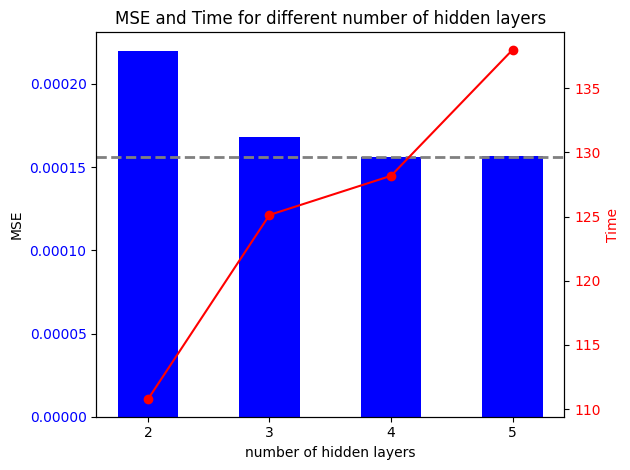

The number of neurons per layer is chosen to be either 512 or 1024, as indicated by the plot, which shows these configurations to be more effective.

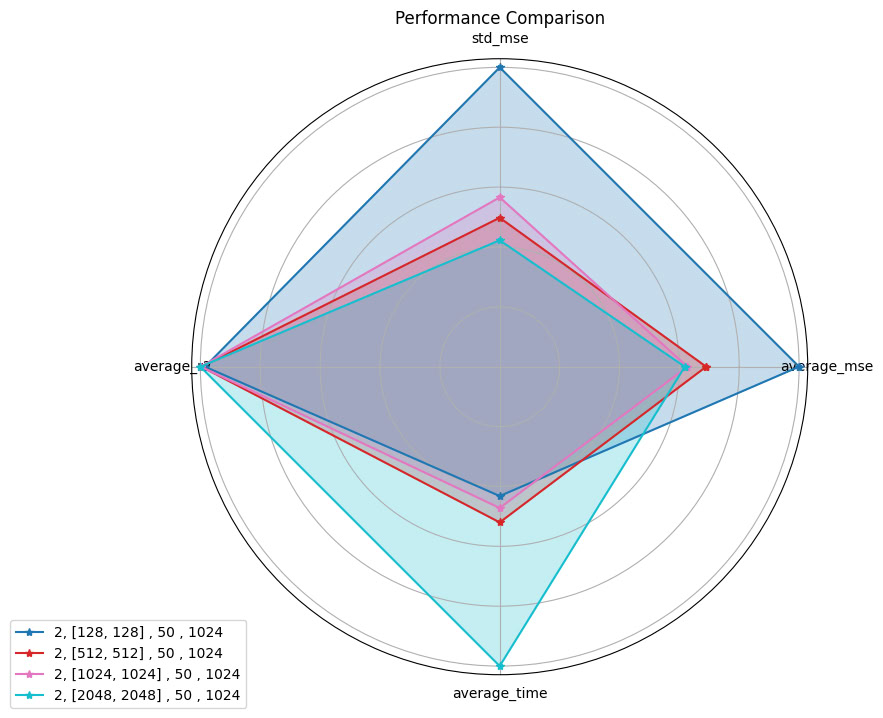

To assess the generalization capability of our models, we conducted tests on an airfoil profile that was not included in the original dataset(not training nor test). This evaluation allows us to gauge the models' performance on truly unseen data, which is crucial for real-world applications.
We compared the lift coefficient (Cl) and drag coefficient (Cd) predictions across various angles of attack (alpha) for this new airfoil. The baseline for comparison was established using XFOIL.

Our evaluation encompassed multiple model configurations, including:
Different types of neural network architectures
Various normalization techniques applied to the input data
Diverse hyperparameter configurations

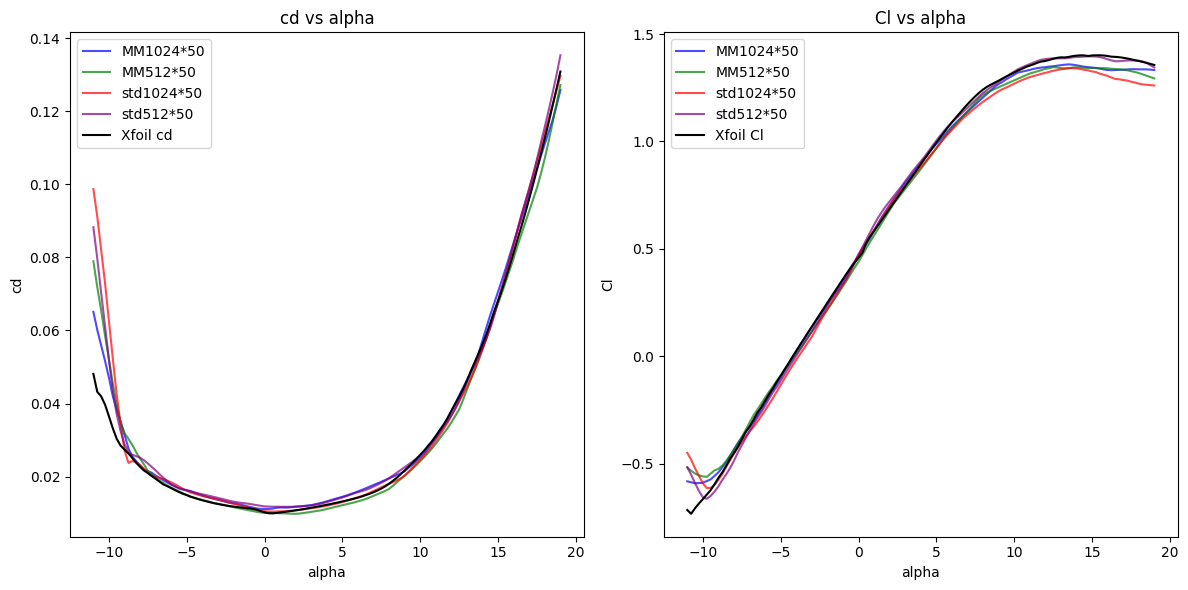

as we can see, the model with minmax normalization and three hidden layer each 1024 neurons have better predictions. however , the standard normalization with 512 neurons in three hidden layer also seems have a good prediction except in lowest negative alphas, where the error between prediction and actual value are high.

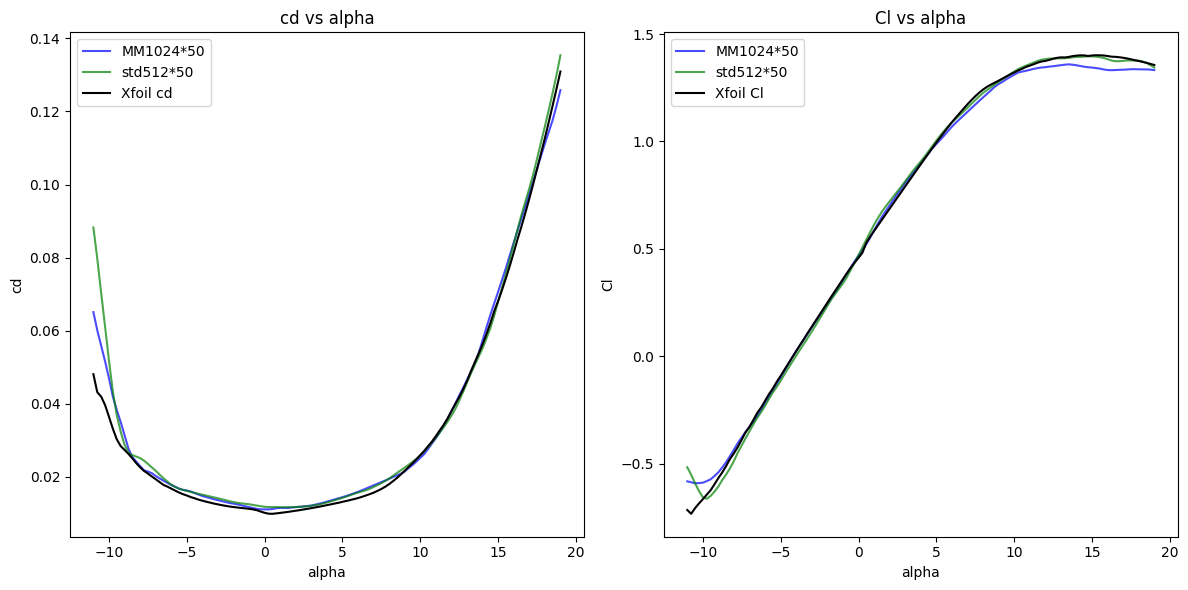

"Increasing the number of epochs, as demonstrated, does not provide any additional benefit."
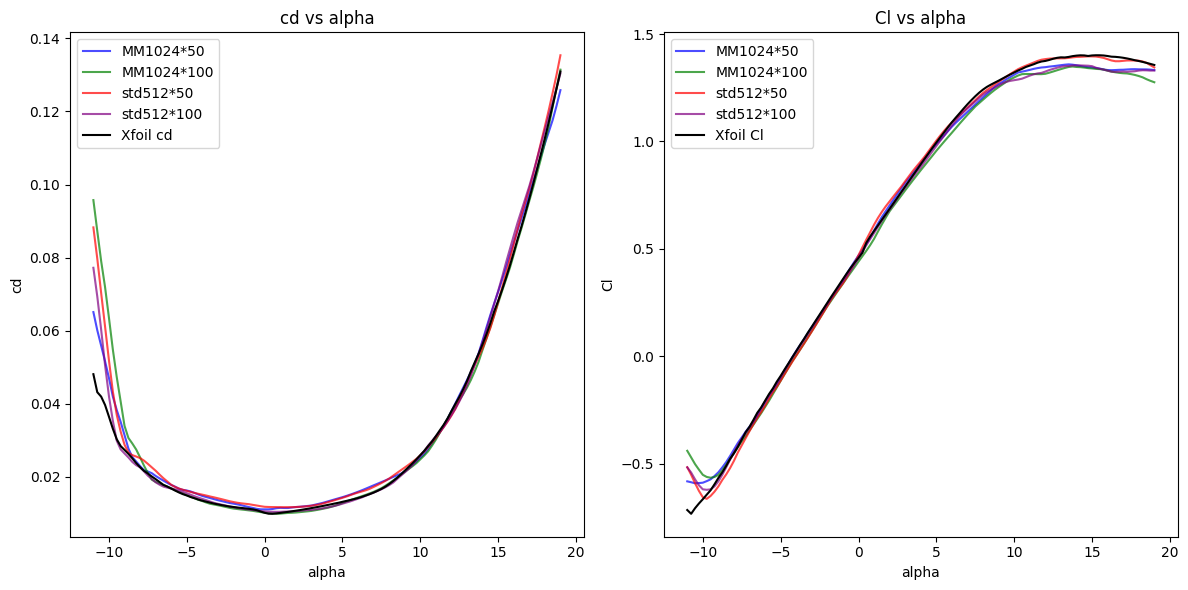
